## Классификация RUL различными методами
(Ноутбук для классических алгоритмов)

TO DO:
- LogReg
- Random Forest
- Gradient Boosting (sklearn, xgboost, catboost)

#### Импорт библиотек

In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from PIL import Image
import itertools
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array

import warnings
warnings.filterwarnings("ignore")

#### Чтение данных

In [2]:
df = pd.read_parquet('data/train_data.parquet')

In [3]:
test = pd.read_parquet('data/test_data.parquet')

Отшкалируем данные и удалим наны

In [4]:
# params = ['setting1', 'setting2', 'setting3', 's1', 's2', 's3',
#        's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
#        's15', 's16', 's17', 's18', 's19', 's20', 's21']

params = ['setting1', 'setting2', 's2', 's3', 's4', 's7', 
          's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 
          's20', 's21']

In [5]:
scaler = StandardScaler()
df[params] = scaler.fit_transform(df[params])

In [6]:
test[params] = scaler.fit_transform(test[params])

In [10]:
xtrain = df[params]
ytrain = df['label']
xtest = test[params]
ytest = test['label']


In [ ]:
def get_results(model, y_test, y_pred, y_):
    
    multiclass_metrics = {
                            'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                            'macro F1' : metrics.f1_score(y_test, y_pred, average='macro'),
                            'micro F1' : metrics.f1_score(y_test, y_pred, average='micro'),
                            'macro Precision' : metrics.precision_score(y_test, y_pred,  average='macro'),
                            'micro Precision' : metrics.precision_score(y_test, y_pred,  average='micro'),
                            'macro Recall' : metrics.recall_score(y_test, y_pred,  average='macro'),
                            'micro Recall' : metrics.recall_score(y_test, y_pred,  average='micro'),
                            'macro ROC AUC' : metrics.roc_auc_score(y_test, y_score, average='macro'),
                            'micro ROC AUC' : metrics.roc_auc_score(y_test, y_score, average='micro')
                        }

    df_metrics = pd.DataFrame.from_dict(multiclass_metrics, orient='index')
    df_metrics.columns = [model]

#### Логистическая регрессия

In [11]:
model = LogisticRegression(solver='saga',
                  multi_class='multinomial',
                  max_iter=10000)

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89     11856
           1       0.23      0.55      0.33      1180
           2       0.11      1.00      0.21        60

    accuracy                           0.79     13096
   macro avg       0.44      0.79      0.47     13096
weighted avg       0.92      0.79      0.84     13096



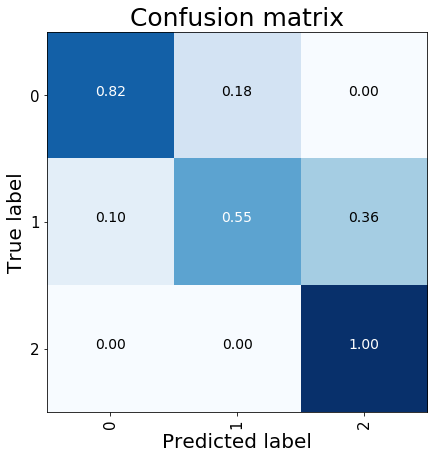

In [14]:
cnf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], title="Confusion matrix")
plt.show()

Случайный лес

In [15]:
model = RandomForestClassifier(n_estimators=50)

model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     11856
           1       0.21      0.56      0.31      1180
           2       0.11      1.00      0.20        60

    accuracy                           0.77     13096
   macro avg       0.44      0.78      0.46     13096
weighted avg       0.92      0.77      0.83     13096



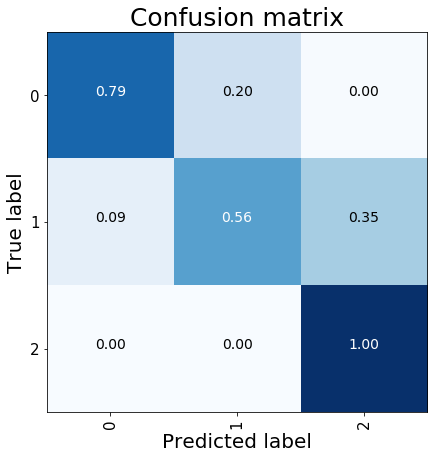

In [16]:
cnf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], title="Confusion matrix")
plt.show()

#### Градиентный бустинг

In [19]:
clf = XGBClassifier(max_depth=6,
                        learning_rate=0.01,
                        objective='multi:softmax',
                        n_jobs=-1,
                        n_estimators=500, 
                        num_class=3)

clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     11856
           1       0.22      0.55      0.31      1180
           2       0.11      1.00      0.20        60

    accuracy                           0.77     13096
   macro avg       0.44      0.78      0.46     13096
weighted avg       0.91      0.77      0.83     13096



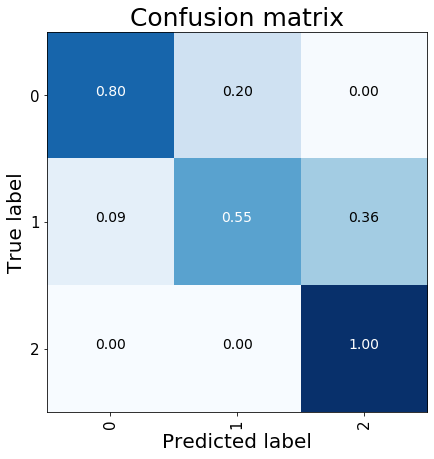

In [33]:
cnf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], title="Confusion matrix")
plt.show()

In [35]:
clf = GradientBoostingClassifier(learning_rate=0.01,
                        n_estimators=500)

clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     11856
           1       0.22      0.57      0.31      1180
           2       0.11      1.00      0.21        60

    accuracy                           0.77     13096
   macro avg       0.44      0.79      0.47     13096
weighted avg       0.92      0.77      0.82     13096



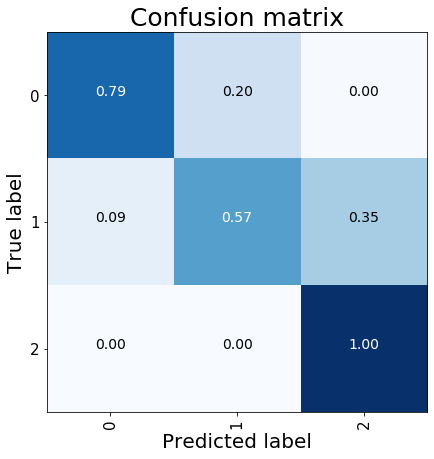

In [36]:
cnf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], title="Confusion matrix")
plt.show()

In [42]:
model = CatBoostClassifier(learning_rate=0.01,
                          max_depth=6,
                         n_estimators=300)
# Fit model
model.fit(xtrain, ytrain)
# Get predictions
y_pred = model.predict(xtest)

0:	learn: 1.0851444	total: 60.4ms	remaining: 18.1s
1:	learn: 1.0721648	total: 140ms	remaining: 20.9s
2:	learn: 1.0593225	total: 214ms	remaining: 21.2s
3:	learn: 1.0470658	total: 288ms	remaining: 21.3s
4:	learn: 1.0349177	total: 353ms	remaining: 20.8s
5:	learn: 1.0230522	total: 401ms	remaining: 19.6s
6:	learn: 1.0114045	total: 448ms	remaining: 18.8s
7:	learn: 1.0000323	total: 490ms	remaining: 17.9s
8:	learn: 0.9889100	total: 539ms	remaining: 17.4s
9:	learn: 0.9780772	total: 580ms	remaining: 16.8s
10:	learn: 0.9674235	total: 627ms	remaining: 16.5s
11:	learn: 0.9570974	total: 670ms	remaining: 16.1s
12:	learn: 0.9469790	total: 717ms	remaining: 15.8s
13:	learn: 0.9372212	total: 759ms	remaining: 15.5s
14:	learn: 0.9274037	total: 799ms	remaining: 15.2s
15:	learn: 0.9178436	total: 840ms	remaining: 14.9s
16:	learn: 0.9085211	total: 884ms	remaining: 14.7s
17:	learn: 0.8993934	total: 927ms	remaining: 14.5s
18:	learn: 0.8904048	total: 968ms	remaining: 14.3s
19:	learn: 0.8815360	total: 1.01s	remain

In [43]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.79      0.88     11856
           1       0.22      0.59      0.32      1180
           2       0.12      1.00      0.22        60

    accuracy                           0.77     13096
   macro avg       0.44      0.79      0.47     13096
weighted avg       0.92      0.77      0.82     13096



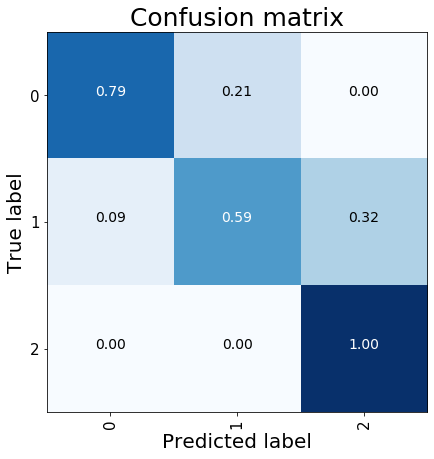

In [44]:
cnf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], title="Confusion matrix")
plt.show()

#### Приложение

In [12]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [21]:
def plot_confusion_matrix1(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()